In [279]:
import pandas  as pd
import numpy as np

In [280]:
df=pd.read_csv("/content/drive/MyDrive/Random Forest/Company_Data.csv")

In [281]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [283]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [284]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


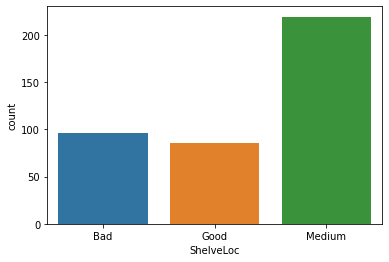

In [285]:
#Shelf Location at stores
sns.countplot(df.ShelveLoc)

In [286]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
df['Sales'] = pd.cut(df.Sales,bins=[0,6,12,17], labels=['Low','Medium', 'High'], right = False)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [287]:
df.Sales.value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [288]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [289]:
#converting categorical data into numeric 
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()

In [290]:
df['Sales']=Encoder.fit_transform(df["Sales"])
df['ShelveLoc']=Encoder.fit_transform(df["ShelveLoc"])
df['Urban']=Encoder.fit_transform(df["Urban"])
df['US']=Encoder.fit_transform(df["US"])


In [291]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [292]:
df["Sales"].unique()

array([2, 1, 0])

In [293]:
#dividing data into x & y variable 
x=df.iloc[:,1:11]

y=df['Sales']
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int64

In [294]:
#spliting data into training and testing
from sklearn.model_selection import train_test_split

In [295]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

### **Building Decision Tree Classifier using Entropy Criteria[C5.0]**

In [296]:
from sklearn.tree import DecisionTreeClassifier

In [297]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [298]:
#plot the decision tree
from sklearn import tree
import  matplotlib.pyplot as  plt

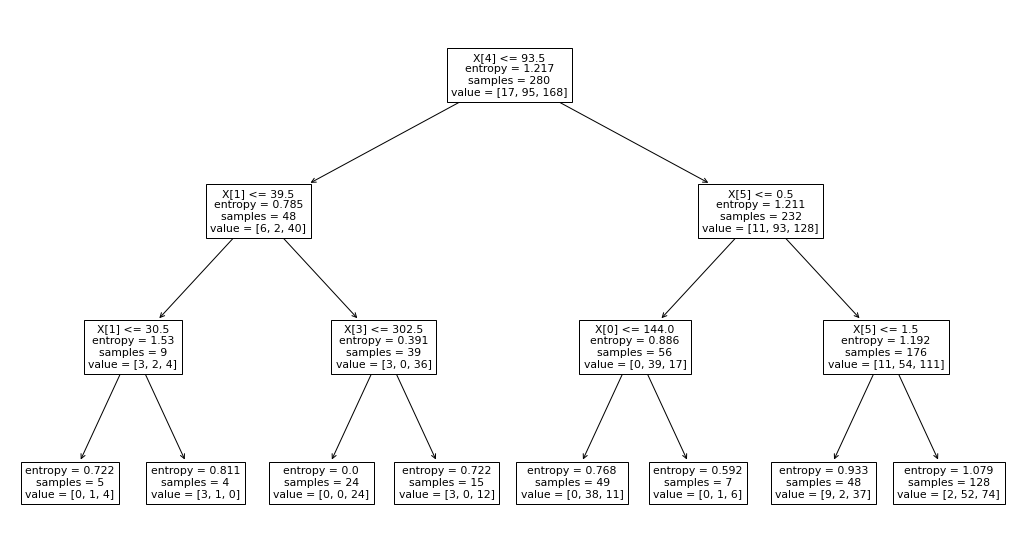

In [299]:
#PLot the decision tree
plt.figure(figsize=(18,10))

tree.plot_tree(model);

In [300]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

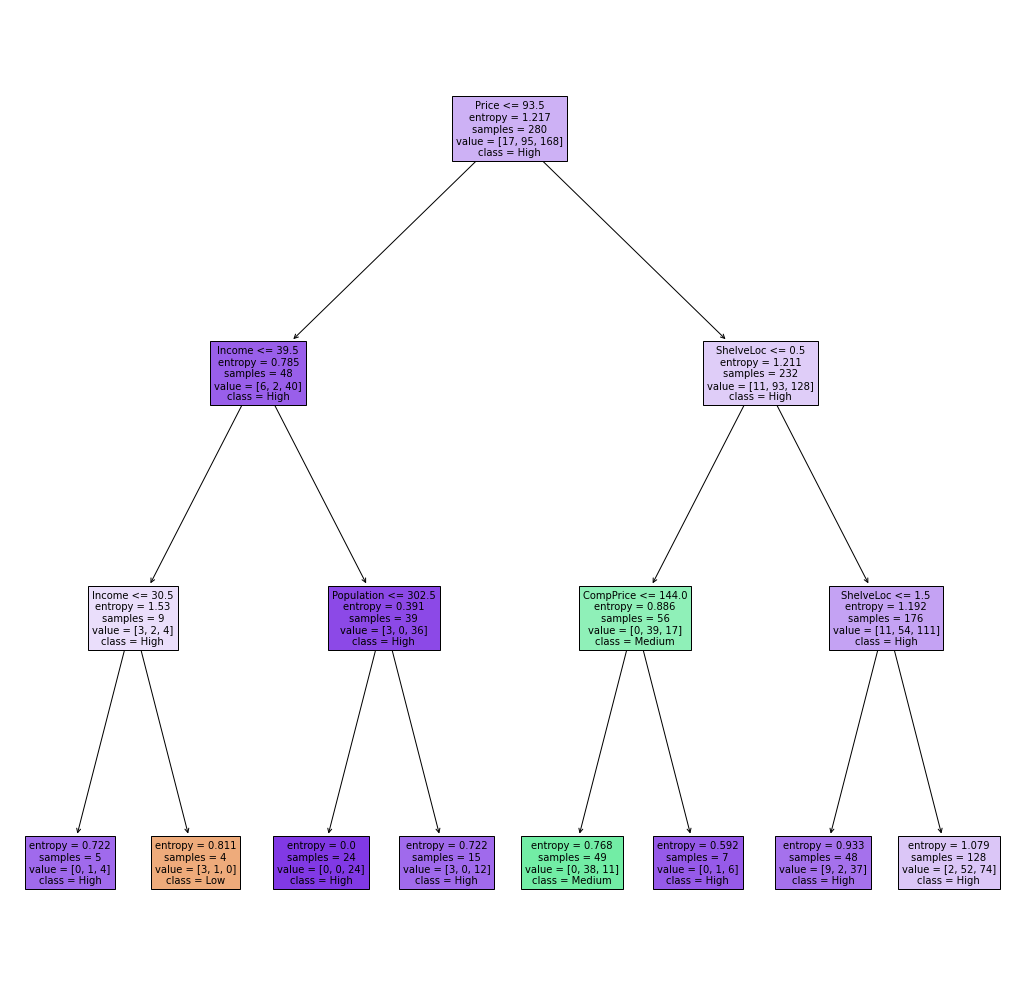

In [301]:
fig, axes = plt.subplots(figsize = (18,18))
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','Medium', 'High']

tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True,
               fontsize=10);

In [302]:
model.feature_importances_

array([0.07940306, 0.15844408, 0.        , 0.04505316, 0.22497597,
       0.49212372, 0.        , 0.        , 0.        , 0.        ])

In [303]:
# predicting on test data set 
preds = model.predict(x_test) 

# getting the count of each category 
pd.Series(preds).value_counts() 

2    98
1    20
0     2
dtype: int64

In [304]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Sales,,,
0,0,0,10
1,0,18,17
2,2,2,71


In [305]:
# Accuracy 
np.mean(preds==y_test)*100

74.16666666666667

## **Building Decision Tree Classifier (CART) using Gini Criteria**

In [306]:
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=3)

In [307]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

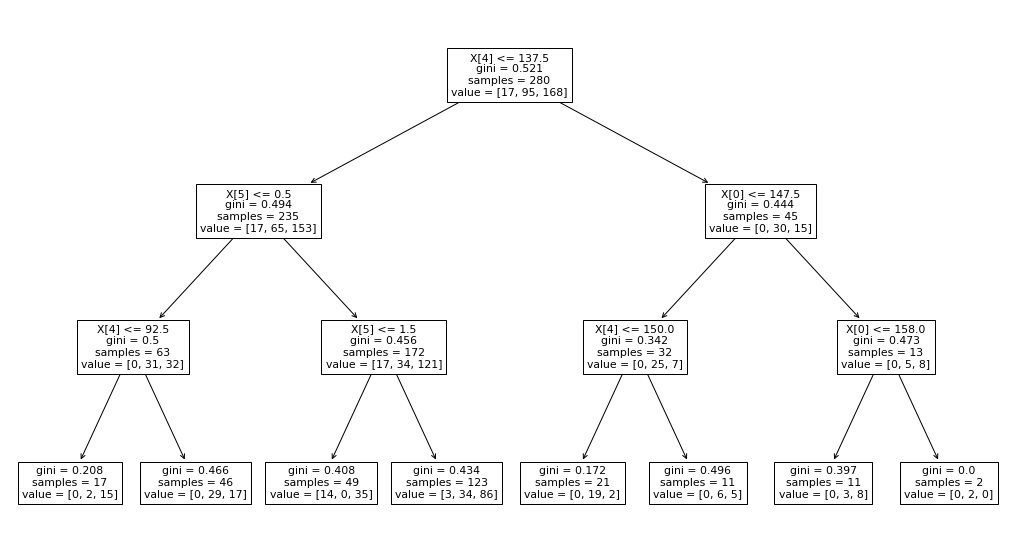

In [308]:
#PLot the decision tree
plt.figure(figsize=(18,10))

tree.plot_tree(model_gini);

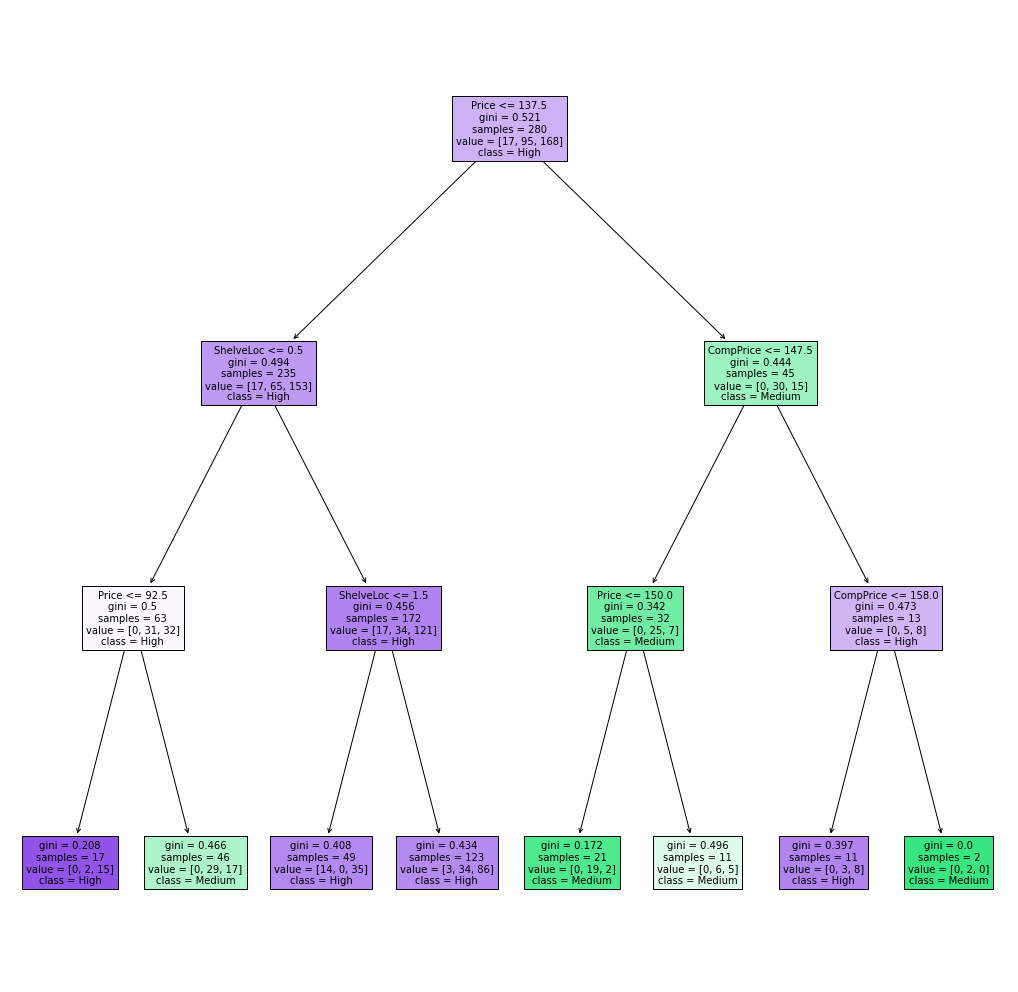

In [309]:
fig, axes = plt.subplots(figsize = (18,18))
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','Medium', 'High']

tree.plot_tree(model_gini,
               feature_names = fn,
               class_names=cn,
               filled = True,
               fontsize=10);

In [310]:
pred=model_gini.predict(x_test)
pd.Series(preds).value_counts()

2    98
1    20
0     2
dtype: int64

In [311]:
pd.crosstab(y_test,pred)

col_0,1,2
Sales,,
0,0,10
1,24,11
2,9,66


In [312]:
# Accuracy 
np.mean(pred==y_test)

0.75

# Bagging

In [313]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [314]:
kfold=KFold(n_splits=9)#subsample
cart=DecisionTreeClassifier()
num_tree=90

In [315]:
Bagging_model= BaggingClassifier(base_estimator=cart,n_estimators=num_tree,random_state=6)

In [316]:
Bagging_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=90,
                  random_state=6)

In [317]:
result=cross_val_score(Bagging_model,x_train,y_train,cv=kfold)
print(result.mean())

0.7142697132616488


In [318]:
Bagging_preds = Bagging_model.predict(x_test)
pd.crosstab(y_test,Bagging_preds)

col_0,0,1,2
Sales,,,
0,1,0,9
1,0,20,15
2,0,11,64


In [319]:
# Accuracy 
np.mean(Bagging_preds==y_test)*100

70.83333333333334

## **Random forest classification**

In [320]:
#importing liabrary
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [321]:
num_trees = 120
max_features = 3
kfold=KFold(n_splits=12, random_state=6,shuffle=True)
modelr=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
modelr.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=120)

In [322]:
result=cross_val_score(modelr,x_train,y_train,cv=kfold)
print(result.mean())

0.7356582125603862


In [323]:
# predicting on test data set 
preds = modelr.predict(x_test) 
 
pd.crosstab(preds,y_test)

Sales,0,1,2
row_0,,,
1,0,21,6
2,10,14,69


In [324]:
# Accuracy 
np.mean(preds==y_test)*100

75.0

## **AdaBoost Classification**

In [325]:
from sklearn.ensemble import AdaBoostClassifier

In [326]:
num_tree=20
seed=7
kfold=KFold(n_splits=14)
modelA=AdaBoostClassifier(n_estimators=num_tree,random_state=seed)


modelA.fit(x_train,y_train)

result=cross_val_score(modelA,x_train,y_train,cv=kfold)
print(result.mean())

0.6500000000000001


In [327]:
# predicting on test data set 
preds = modelA.predict(x_test) 

pd.crosstab(preds,y_test)

Sales,0,1,2
row_0,,,
0,3,0,2
1,0,13,3
2,7,22,70


In [328]:
# Accuracy 
np.mean(preds==y_test)*100

71.66666666666667